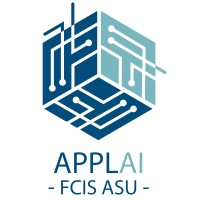

# **Data Description :**


Air Pollution is contamination of the indoor or outdoor environment by any chemical, physical or biological agent that modifies the natural characteristics of the atmosphere. Household combustion devices, motor vehicles, industrial facilities and forest fires are common sources of air pollution. Pollutants of major public health concern include particulate matter, carbon monoxide, ozone, nitrogen dioxide and sulfur dioxide. Outdoor and indoor air pollution cause respiratory and other diseases and are important sources of morbidity and mortality.

This dataset provides geolocated information about the following pollutants:

Nitrogen Dioxide [NO2] : Nitrogen Dioxide is one of the several nitrogen oxides. It is introduced into the air by natural phenomena like entry from stratosphere or lighting. At the surface level, however, NO2 forms from cars, trucks and buses emissions, power plants and off-road equipment. Exposure over short periods can aggravate respiratory diseases, like asthma. Longer exposures may contribute to develoment of asthma and respiratory infections. People with asthma, children and the elderly are at greater risk for the health effects of NO2.

Ozone [O3] : The Ozone molecule is harmful for outdoor air quality (if outside of the ozone layer). At surface level, ozone is created by chemical reactions between oxides of nitrogen and volatile organic compounds (VOC). Differently from the good ozone located in the upper atmosphere, ground level ozone can provoke several health problems like chest pain, coughing, throat irritation and airway inflammation. Furthermore it can reduce lung function and worsen bronchitis, emphysema, and asthma. Ozone affects also vegetation and ecosystems. In particular, it damages sensitive vegetation during the growing season.

Carbon Monoxide [CO] : Carbon Monoxide is a colorless and odorless gas. Outdoor, it is emitted in the air above all by cars, trucks and other vehicles or machineries that burn fossil fuels. Such items like kerosene and gas space heaters, gas stoves also release CO affecting indoor air quality.
Breathing air with a high concentration of CO reduces the amount of oxygen that can be transported in the blood stream to critical organs like the heart and brain. At very high levels, which are not likely to occur outdoor but which are possible in enclosed environments. CO can cause dizziness, confusion, unconsciousness and death.

Particulate Matter [PM2.5] : Atmospheric Particulate Matter, also known as atmospheric aerosol particles, are complex mixtures of small solid and liquid matter that get into the air. If inhaled they can cause serious heart and lungs problem. They have been classified as group 1 carcinogen by the International Agengy for Research on Cancer (IARC). PM10 refers to those particules with a diameter of 10 micrometers or less. PM2.5 refers to those particles with a diameter of 2.5 micrometers or less.

Content

Country : Name of the country
City : Name of the city
AQI Value : Overall AQI value of the city
AQI Category : Overall AQI category of the city
CO AQI Value : AQI value of Carbon Monoxide of the city
CO AQI Category : AQI category of Carbon Monoxide of the city
Ozone AQI Value : AQI value of Ozone of the city
Ozone AQI Category : AQI category of Ozone of the city
NO2 AQI Value : AQI value of Nitrogen Dioxide of the city
NO2 AQI Category : AQI category of Nitrogen Dioxide of the city
PM2.5 AQI Value : AQI value of Particulate Matter with a diameter of 2.5 micrometers or less of the city
PM2.5 AQI Category : AQI category of Particulate Matter with a diameter of 2.5 micrometers or less of the city

# **Data preprocessing**

## Importing Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/global air pollution dataset.csv")
df.head()

Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2               Italy   Priolo Gargallo         66     Moderate             1   
3              Poland         Przasnysz         34         Good             1   
4              France          Punaauia         22         Good             0   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good               39               Good              2   
3            Good               34               Good              0   
4            Good               22               Good              0   

  NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category  
0             Good               51           Moderate  
1             Good               41               Good  
2             Good               66           Moderate  
3             Good               20               Good  
4             Good                6               Good

statistical summary and some information

In [ ]:
df.describe()

AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
count  23463.000000  23463.000000     23463.000000   23463.000000   
mean      72.010868      1.368367        35.193709       3.063334   
std       56.055220      1.832064        28.098723       5.254108   
min        6.000000      0.000000         0.000000       0.000000   
25%       39.000000      1.000000        21.000000       0.000000   
50%       55.000000      1.000000        31.000000       1.000000   
75%       79.000000      1.000000        40.000000       4.000000   
max      500.000000    133.000000       235.000000      91.000000   

       PM2.5 AQI Value  
count     23463.000000  
mean         68.519755  
std          54.796443  
min           0.000000  
25%          35.000000  
50%          54.000000  
75%          79.000000  
max         500.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


## Outliers or wrong values

<Axes: xlabel='AQI Value', ylabel='AQI Category'>

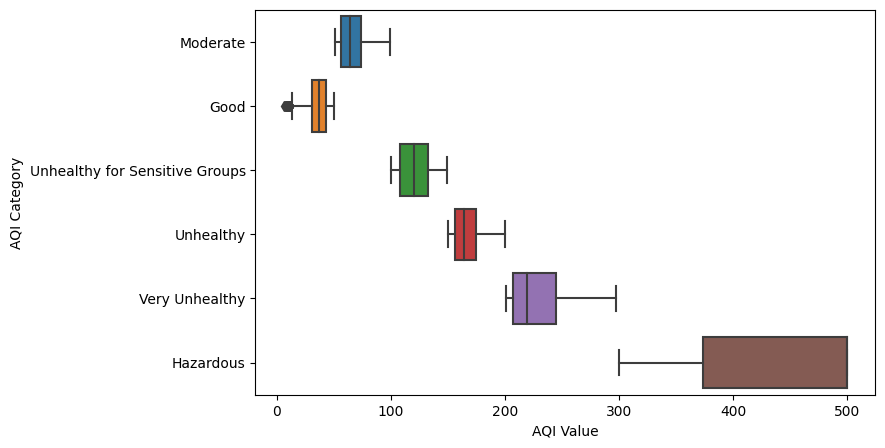

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,y="AQI Category", x="AQI Value")

In [ ]:
for health_level in df["AQI Category"].unique():
    Aqi_dataset = df[df["AQI Category"] == health_level]
    print(health_level)
    print(Aqi_dataset["AQI Value"].describe(),"\n")

Moderate
count    9231.000000
mean       66.454664
std        12.317015
min        51.000000
25%        56.000000
50%        64.000000
75%        74.000000
max        99.000000
Name: AQI Value, dtype: float64 

Good
count    9936.000000
mean       36.480978
std         8.579492
min         6.000000
25%        31.000000
50%        37.000000
75%        43.000000
max        50.000000
Name: AQI Value, dtype: float64 

Unhealthy for Sensitive Groups
count    1591.000000
mean      121.135135
std        14.475873
min       100.000000
25%       108.000000
50%       120.000000
75%       133.000000
max       149.000000
Name: AQI Value, dtype: float64 

Unhealthy
count    2227.000000
mean      166.712618
std        13.108883
min       150.000000
25%       156.000000
50%       164.000000
75%       175.000000
max       200.000000
Name: AQI Value, dtype: float64 

Very Unhealthy
count    287.000000
mean     228.080139
std       26.108646
min      201.000000
25%      207.000000
50%      219.000000
75

The AQI ranges from 0 to 500, with higher values indicating greater levels of pollution and corresponding health concerns. An AQI value of 100 is considered moderate, while values above 150 are considered unhealthy for sensitive groups and values above 200 are considered unhealthy for the general public.

No issues between AQI values and categories where each value has it's correct category.

Good health level may have some outliers

<Axes: xlabel='CO AQI Value', ylabel='CO AQI Category'>

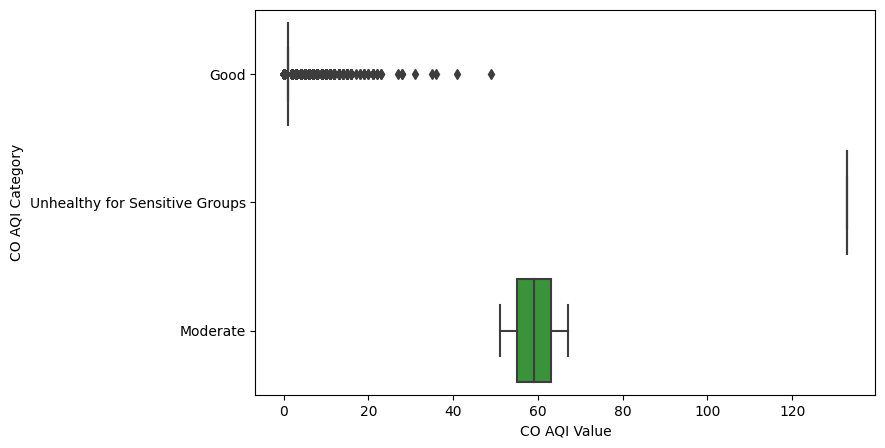

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,y="CO AQI Category", x="CO AQI Value")

In [ ]:
df[df["CO AQI Category"]=="Unhealthy for Sensitive Groups"]["CO AQI Value"].describe()

count      1.0
mean     133.0
std        NaN
min      133.0
25%      133.0
50%      133.0
75%      133.0
max      133.0
Name: CO AQI Value, dtype: float64

Good CO AQI category contains many outliers, unhealthy for sensitive groups doesn't contain any value either than 133

<Axes: xlabel='Ozone AQI Value', ylabel='Ozone AQI Category'>

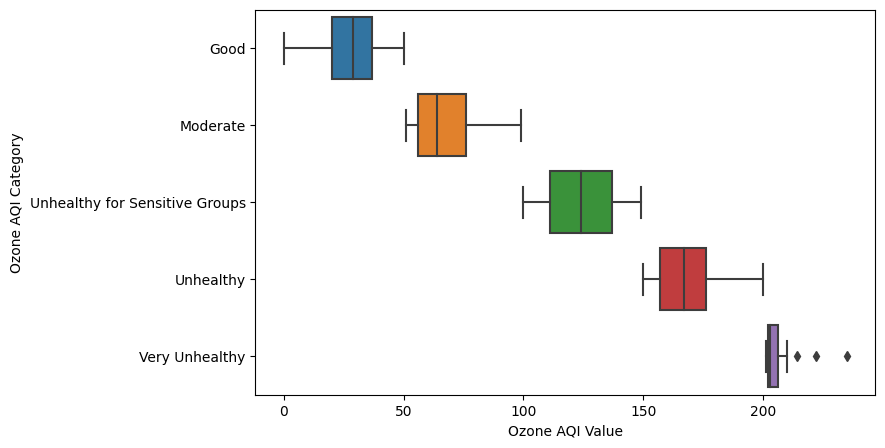

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,y="Ozone AQI Category", x="Ozone AQI Value")

Ozon AQI well organize but 'very unhealthy values ' have outliers.

<Axes: xlabel='NO2 AQI Value', ylabel='NO2 AQI Category'>

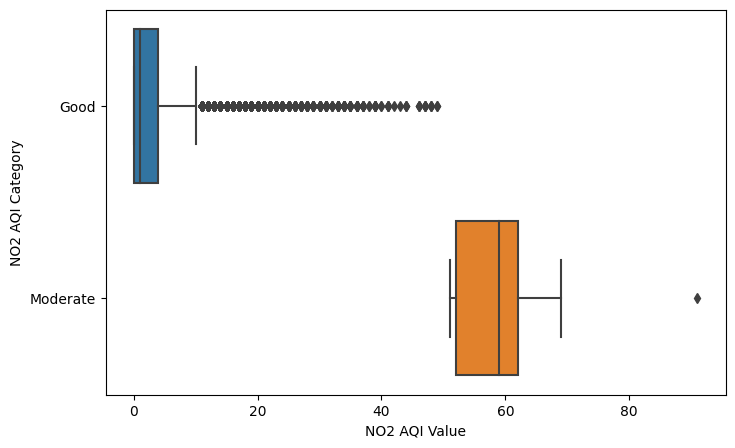

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,y="NO2 AQI Category", x="NO2 AQI Value")

In [ ]:
for health_level in df["NO2 AQI Category"].unique():
    Aqi_dataset = df[df["NO2 AQI Category"] == health_level]
    print(health_level)
    print(Aqi_dataset["NO2 AQI Value"].describe(),"\n")

Good
count    23448.000000
mean         3.027209
std          5.051569
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         49.000000
Name: NO2 AQI Value, dtype: float64 

Moderate
count    15.000000
mean     59.533333
std      10.322421
min      51.000000
25%      52.000000
50%      59.000000
75%      62.000000
max      91.000000
Name: NO2 AQI Value, dtype: float64 



No2 values have outliers, more likely in good category.

<Axes: xlabel='PM2.5 AQI Value', ylabel='PM2.5 AQI Category'>

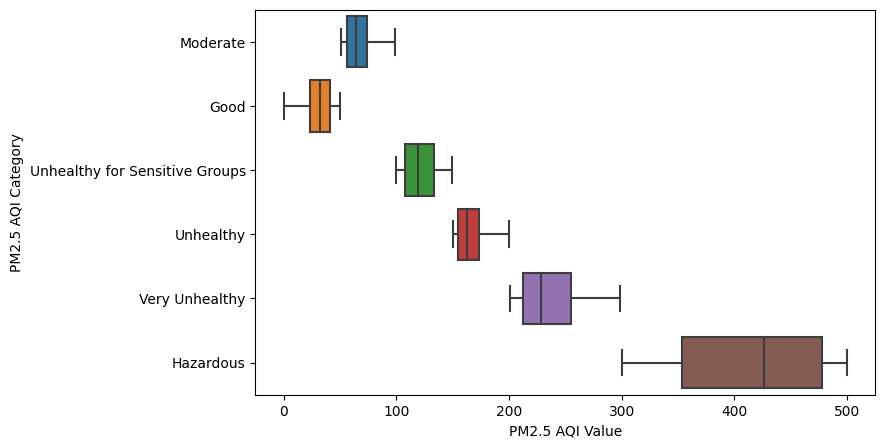

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,y="PM2.5 AQI Category", x="PM2.5 AQI Value")

PM2.5 almost doesn't have outliers

## Outliers conclusion

Despite the presence of outliers, the data ranges appear to be valid.

## Duplicates

In [ ]:
df.duplicated().sum()

0

## Null values

In [ ]:
df.isna().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

only country column have nulls and one value in city.

In [ ]:
df.isna().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

This function accepts a city name as input and returns the corresponding country name.

In [ ]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="geoapiExercises")

# define a function to get the country name from the city name
def get_country(city):
    location = geolocator.geocode(city)
    if location is not None:
        try:
            result = location.address.split(",")[-1].strip()
        except:
            result = None
    else:
        result = None
    return result

Because the API prints different words from the dataset, such as 'مصر' instead of 'Egypt', this function creates a mapping of each country name to its correct name, and generates a map with these mappings as key-value pairs. For example, {'Italia':'Italy', 'مصر':'Egypt'}.

In [ ]:
def get_country_map():
    country_dict = dict()
    result = df.groupby("Country", as_index=False).apply(lambda x: x.loc[np.random.choice(x.index, 8, replace=True), :])
    for country in df["Country"].unique():
        try:
            country_mode=str(result.loc[result['Country']==country]["City"].apply(get_country).mode().iloc[0])
        except:
            None
        
        if country_mode in country_dict and (df["Country"] == country).sum() < 4:
            None
        else:
            country_dict[country_mode]=country
    return country_dict

In [ ]:
country_map=get_country_map()

It seems that the dictionary works good and almost all the names are correct.

In [ ]:
country_map

{'Россия': 'Russian Federation',
 'Brasil': 'Brazil',
 'Italia': 'Italy',
 'Polska': 'Poland',
 'France': 'France',
 'United States': 'United States of America',
 'Deutschland': 'Germany',
 'België / Belgique / Belgien': 'Belgium',
 'مصر': 'Egypt',
 '中国': 'China',
 'Nederland': 'Netherlands',
 'India': 'India',
 'پاکستان': 'Pakistan',
 'Северна Македонија': 'Republic of North Macedonia',
 'Colombia': 'Colombia',
 'România': 'Romania',
 'Indonesia': 'Indonesia',
 'Suomi / Finland': 'Finland',
 'South Africa': 'South Africa',
 'United Kingdom': 'United Kingdom of Great Britain and Northern Ireland',
 'Tanzania': 'United Republic of Tanzania',
 'Ayiti': 'Haiti',
 'Soomaaliya الصومال': 'Somalia',
 'Philippines': 'Philippines',
 'Latvija': 'Latvia',
 'Tchad تشاد': 'Chad',
 'New Zealand/Aotearoa': 'New Zealand',
 'اليمن': 'Yemen',
 'Việt Nam': 'Viet Nam',
 'ایران': 'Iran (Islamic Republic of)',
 'México': 'Mexico',
 '日本': 'Japan',
 'El Salvador': 'El Salvador',
 'България': 'Bulgaria',
 'Nig

Replacing each null value using the API

In [ ]:
null_rows = df["Country"].isnull()
df.loc[null_rows, "Country"] = df.loc[null_rows, "City"].apply(lambda x: get_country(x))


In [ ]:
df["Country"].value_counts().head()

United States of America    2913
India                       2504
Brazil                      1594
Germany                     1346
Russian Federation          1243
Name: Country, dtype: int64

replacing the names of the country with the correct ones

In [ ]:
df.replace(country_map,inplace=True)

In [ ]:
df["Country"].value_counts().head()

United States of America    2913
India                       2504
Brazil                      1594
Germany                     1346
Russian Federation          1243
Name: Country, dtype: int64

In [ ]:
df.isna().sum()

Country               7
City                  1
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64

Only 7 nulls are left now, removing them won't change effect the data.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.to_csv("Global air pollution preprocessed.csv", index=False)

# **Exploratory Data Analysis :**

In [ ]:
import plotly.subplots as sp
import plotly.graph_objs as go
import plotly.express as px

In [ ]:
# importing data after preprocessing
df = pd.read_csv("/content/Global air pollution preprocessed.csv")
df.head()

Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2               Italy   Priolo Gargallo         66     Moderate             1   
3              Poland         Przasnysz         34         Good             1   
4              France          Punaauia         22         Good             0   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good               39               Good              2   
3            Good               34               Good              0   
4            Good               22               Good              0   

  NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category  
0             Good               51           Moderate  
1             Good               41               Good  
2             Good               66           Moderate  
3             Good               20               Good  
4             Good                6               Good

## Numeric Analysis : 

In [ ]:
numeric_columns = ['AQI Value','CO AQI Value','Ozone AQI Value','NO2 AQI Value','PM2.5 AQI Value']
categorical_columns = ['Country','City','AQI Category','CO AQI Category','Ozone AQI Category','NO2 AQI Category','PM2.5 AQI Category']

# Dividing into numeric dataset and categorical dataset
numeric_df = df[numeric_columns]
categorical_df =df[categorical_columns]

### Describing numeric and categorical data

In [ ]:
numeric_df.describe()

AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
count  23455.000000  23455.000000     23455.000000   23455.000000   
mean      72.012961      1.368535        35.192411       3.064208   
std       56.061361      1.832320        28.102257       5.254734   
min        6.000000      0.000000         0.000000       0.000000   
25%       39.000000      1.000000        21.000000       0.000000   
50%       55.000000      1.000000        31.000000       1.000000   
75%       79.000000      1.000000        40.000000       4.000000   
max      500.000000    133.000000       235.000000      91.000000   

       PM2.5 AQI Value  
count     23455.000000  
mean         68.522234  
std          54.801205  
min           0.000000  
25%          35.000000  
50%          54.000000  
75%          79.000000  
max         500.000000

In [ ]:
categorical_df.describe()

Country        City AQI Category CO AQI Category  \
count                      23455       23455        23455           23455   
unique                       182       23455            6               3   
top     United States of America  Praskoveya         Good            Good   
freq                        2913           1         9933           23452   

       Ozone AQI Category NO2 AQI Category PM2.5 AQI Category  
count               23455            23455              23455  
unique                  5                2                  6  
top                  Good             Good               Good  
freq                21062            23440              10205

In [ ]:
df.pivot_table(index="AQI Category", aggfunc='mean')

<ipython-input-19-e692a7bc2610>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(index="AQI Category", aggfunc='mean')


AQI Value  CO AQI Value  NO2 AQI Value  \
AQI Category                                                              
Good                             36.479412      0.772476       1.477097   
Hazardous                       440.937173      3.743455       3.759162   
Moderate                         66.455728      1.292619       3.637802   
Unhealthy                       166.712618      3.090256       5.436462   
Unhealthy for Sensitive Groups  121.119497      2.138365       5.366038   
Very Unhealthy                  228.080139      5.233449       7.930314   

                                Ozone AQI Value  PM2.5 AQI Value  
AQI Category                                                      
Good                                  28.286822        31.600423  
Hazardous                             58.486911       400.204188  
Moderate                              31.289043        65.434269  
Unhealthy                             68.986529       162.685676  
Unhealthy for Sensitive Groups        41.868553       118.237107  
Very Unhealthy                        84.968641       218.825784

In [ ]:
df.pivot_table(index="CO AQI Category", aggfunc='mean')

<ipython-input-20-085c4e590962>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(index="CO AQI Category", aggfunc='mean')


AQI Value  CO AQI Value  NO2 AQI Value  \
CO AQI Category                                                           
Good                             71.971431      1.358008       3.061956   
Moderate                        345.000000     59.000000       4.500000   
Unhealthy for Sensitive Groups  500.000000    133.000000      53.000000   

                                Ozone AQI Value  PM2.5 AQI Value  
CO AQI Category                                                   
Good                                  35.186338        68.483967  
Moderate                             124.000000       301.500000  
Unhealthy for Sensitive Groups         0.000000       500.000000

In [ ]:
df.pivot_table(index="Ozone AQI Category", aggfunc='mean')

<ipython-input-21-3c2f756729e6>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(index="Ozone AQI Category", aggfunc='mean')


AQI Value  CO AQI Value  NO2 AQI Value  \
Ozone AQI Category                                                        
Good                             64.563289      1.260279       3.184076   
Moderate                        114.097645      1.701524       1.655125   
Unhealthy                       179.856790      3.464198       2.461728   
Unhealthy for Sensitive Groups  164.327902      2.835031       2.323829   
Very Unhealthy                  206.566038      5.716981       5.283019   

                                Ozone AQI Value  PM2.5 AQI Value  
Ozone AQI Category                                                
Good                                  27.916152        62.037128  
Moderate                              67.487535       105.899584  
Unhealthy                            168.355556       157.286420  
Unhealthy for Sensitive Groups       124.167006       153.875764  
Very Unhealthy                       205.018868       158.301887

In [ ]:
df.pivot_table(index="NO2 AQI Category", aggfunc='mean')

<ipython-input-22-ba61294f4069>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(index="NO2 AQI Category", aggfunc='mean')


AQI Value  CO AQI Value  NO2 AQI Value  Ozone AQI Value  \
NO2 AQI Category                                                             
Good               71.888780      1.355162       3.028072        35.211177   
Moderate          266.066667     22.266667      59.533333         5.866667   

                  PM2.5 AQI Value  
NO2 AQI Category                   
Good                    68.396075  
Moderate               265.666667

In [ ]:
df.pivot_table(index="PM2.5 AQI Category", aggfunc='mean')

<ipython-input-23-d5ac779da7e1>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(index="PM2.5 AQI Category", aggfunc='mean')


AQI Value  CO AQI Value  NO2 AQI Value  \
PM2.5 AQI Category                                                        
Good                             37.248604      0.780794       1.460265   
Hazardous                       453.755814      4.052326       4.104651   
Moderate                         67.331496      1.312755       3.698269   
Unhealthy                       167.436355      3.147017       5.617191   
Unhealthy for Sensitive Groups  124.760320      2.218731       5.386938   
Very Unhealthy                  239.898039      4.803922       7.898039   

                                Ozone AQI Value  PM2.5 AQI Value  
PM2.5 AQI Category                                                
Good                                  29.274375        31.711220  
Hazardous                             59.308140       414.081395  
Moderate                              31.560026        66.556829  
Unhealthy                             65.211837       165.561766  
Unhealthy for Sensitive Groups        47.120764       120.773876  
Very Unhealthy                        58.423529       235.764706

### **Conclusion**

* The AQI value columns have slightly different means and standard deviations, indicating that they may have different levels of variability and central tendency. This could suggest that some AQI value types may be more difficult to control or predict than others.

* The AQI Value column has the highest range, meaning that it can have higher spikes and more variation in values. In contrast, the CO AQI Value column has the lowest range, suggesting that it may be less variable over time. This information can be useful when deciding which AQI value type to prioritize in environmental management and policy-making.

* The fact that "good" is the most common category in all the categorical data suggests that the air quality in the area represented in the data is generally good. However, it is important to note that this may not be representative of other regions or areas with different environmental conditions.

* The pivot plots show that as the AQI category gets worse (i.e., from "good" to "unhealthy"), the AQI values tend to increase. This is expected since the AQI categories are based on increasing levels of air pollution, and thus, higher AQI values correspond to worse air quality.

## Graphic Analyis





1. Univariate Analysis : 

In [ ]:
def histplot(x,height=500, width=600,font_size=13, text_auto=True, bins=40):
    fig = px.histogram(df, x=x, text_auto=text_auto, nbins=bins)
    fig.update_layout(barmode='group', title=x, font=dict(size=font_size), legend=dict(title='Heart Disease Status'),height=height, width=width)
    
    fig.update_traces(name='No', selector=dict(name='0'))
    fig.update_traces(name='Yes', selector=dict(name='1'))
    fig.show()

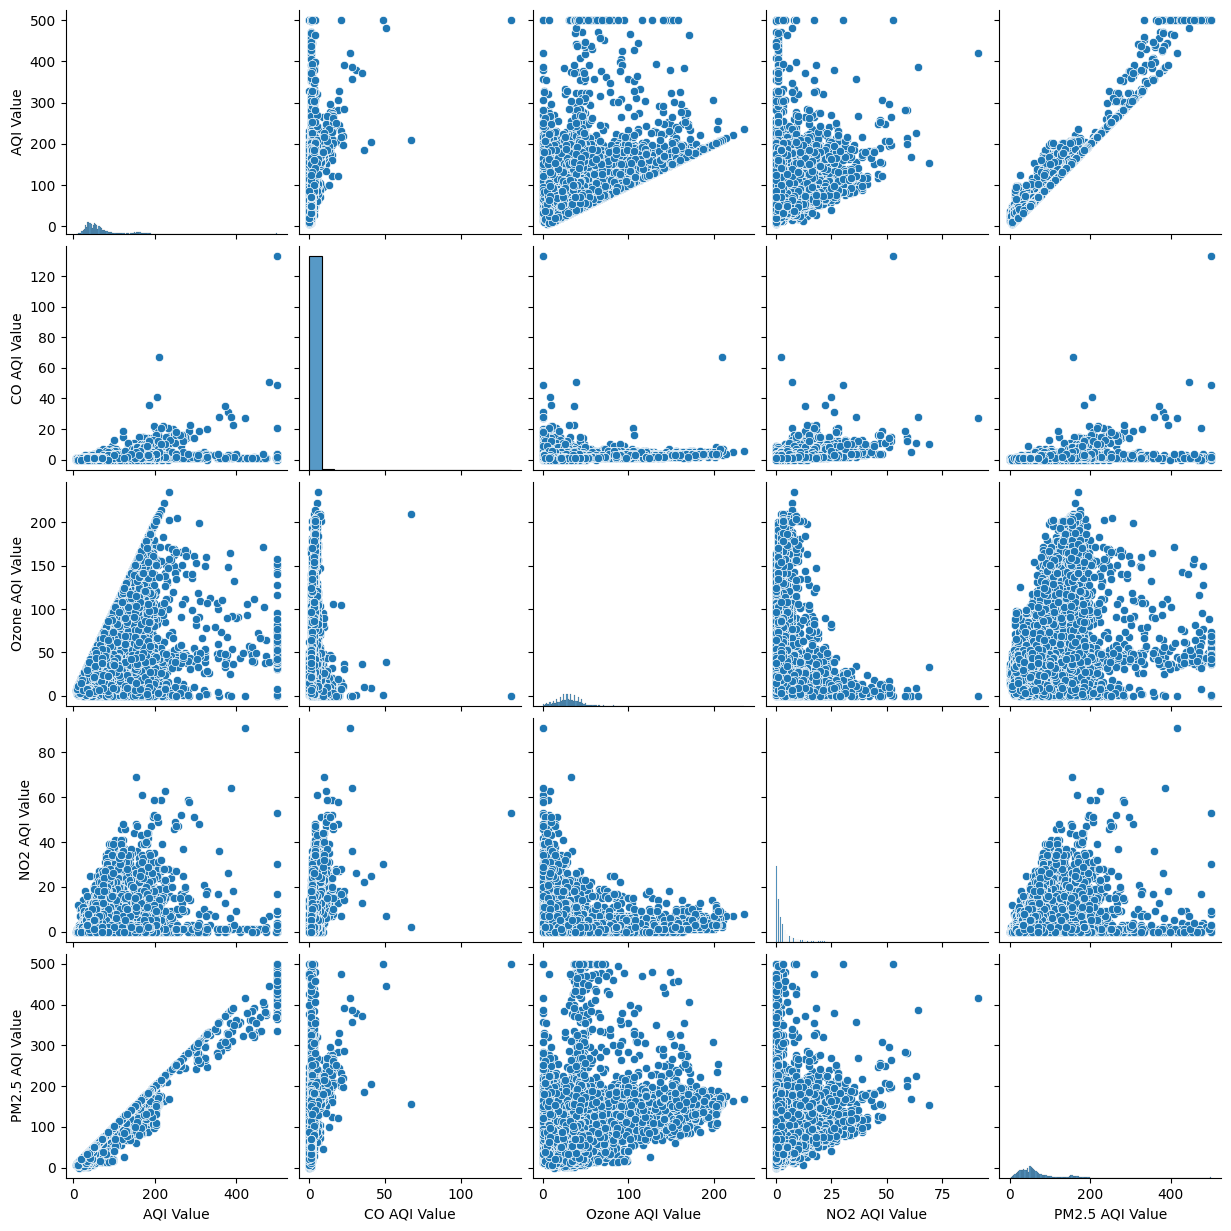

In [ ]:
sns.pairplot(numeric_df)

In [ ]:
import plotly.express as px

aqi_cols = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
aqi_melted = df[aqi_cols].melt(var_name='AQI Value Type', value_name='AQI Value')

fig = px.box(aqi_melted, x='AQI Value Type', y='AQI Value', title='Distribution of AQI Values')
fig.show()

<ipython-input-26-d389202c3c74>:4: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  aqi_melted = df[aqi_cols].melt(var_name='AQI Value Type', value_name='AQI Value')


In [ ]:
nrows = 1
ncols = 5

fig = sp.make_subplots(rows=nrows, cols=ncols, subplot_titles=tuple(categorical_df.columns[2:]))

for i, col in enumerate(categorical_df.iloc[:, 2:].columns):
    trace = go.Histogram(x=categorical_df[col], nbinsx=20)
    fig.add_trace(trace, row=1, col=i+1)

fig.update_traces(showlegend=False)
fig.update_layout(
    title="Histograms of Features", height=600, width=1300)
fig.show()

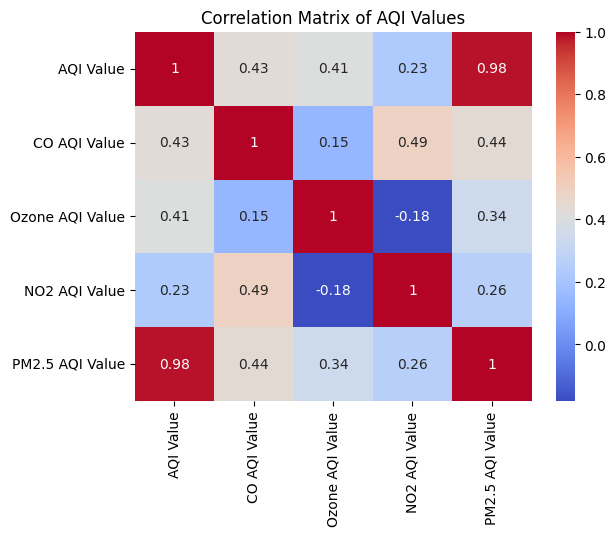

In [ ]:
corr_matrix = df[aqi_cols].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix of AQI Values')
plt.show()

### **conclusion**

* The numeric data columns are directly proportional to each other, meaning that when one of these values increases, the others tend to increase as well. However, they are inversely proportional to the categorical data columns, meaning that as the AQI category gets worse, the numeric AQI values tend to increase. This is expected since the AQI categories are based on increasing levels of air pollution, and thus, higher AQI values correspond to worse air quality.

* The ranges of AQI values in the dataset are concentrated at the bottom, meaning that most of the AQI values in the dataset are in the "good" or "moderate" range. This is consistent with the observation that "good" pollution values are more common in the dataset than "unhealthy" or "hazardous" pollution values. However, it is important to note that this may not be representative of other regions or areas with different environmental conditions.

* Overall, these conclusions suggest that the dataset represents a region with generally good air quality but some instances of worse air quality, and that the AQI values are related to the AQI category but with some variability in the relationships between the different AQI value types. These insights could be useful for environmental management and policy-making decisions in the represented region.

# **Content Created By** [ApplAi](https://www.linkedin.com/company/applaiasu/)
**Directed by :**
* Director of Machine Learning and Training Department: [Eslam Shouman](https://www.linkedin.com/in/eslam-shouman-0958091b4/)


**Team leader:**

* [Nour Ahmed](https://www.linkedin.com/in/nour-ahmeddd-/)


Team Members:
* [Jonathan Mounir](https://www.linkedin.com/in/jonathan-monir/)
* [Sarah Ahmed](https://www.linkedin.com/in/sarahhahmed)
* [Youmna Mohammed](https://www.linkedin.com/in/yomna-muhammed-b964a6270)
* [Habiba Alaa](https://www.linkedin.com/in/habiba-alaa17)

